<a href="https://colab.research.google.com/github/rayhanpratama0031/TugasPraktikum/blob/main/PRAK5/PRAKTIKUM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {uploaded[fn]} bytes')

Saving retail_sales_dataset.csv to retail_sales_dataset.csv
User uploaded file "retail_sales_dataset.csv" with length b'Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount\r\n1,2023-11-24,CUST001,Male,34,Beauty,3,50,150\r\n2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000\r\n3,2023-01-13,CUST003,Male,50,Electronics,1,30,30\r\n4,2023-05-21,CUST004,Male,37,Clothing,1,500,500\r\n5,2023-05-06,CUST005,Male,30,Beauty,2,50,100\r\n6,2023-04-25,CUST006,Female,45,Beauty,1,30,30\r\n7,2023-03-13,CUST007,Male,46,Clothing,2,25,50\r\n8,2023-02-22,CUST008,Male,30,Electronics,4,25,100\r\n9,2023-12-13,CUST009,Male,63,Electronics,2,300,600\r\n10,2023-10-07,CUST010,Female,52,Clothing,4,50,200\r\n11,2023-02-14,CUST011,Male,23,Clothing,2,50,100\r\n12,2023-10-30,CUST012,Male,35,Beauty,3,25,75\r\n13,2023-08-05,CUST013,Male,22,Electronics,3,500,1500\r\n14,2023-01-17,CUST014,Male,64,Clothing,4,30,120\r\n15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000\r\n16,20

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/retail_sales_dataset.csv')

data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [3]:
data['Date'] = pd.to_datetime(data['Date'])      # Ubah kolom Date menjadi datetime
data['Month'] = data['Date'].dt.month            # Ambil angka bulan dari kolom Date
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [4]:
women_df = data[data['Gender'] == 'Female']
men_df = data[data['Gender'] == 'Male']


men_amount_mean = men_df['Total Amount'].mean()
men_amount_median = men_df['Total Amount'].median()
women_amount_mean = women_df['Total Amount'].mean()
women_amount_median = women_df['Total Amount'].median()

# Cetak hasil
print(f"Men mean amount: {men_amount_mean}\t Median: {men_amount_median}")
print(f"Women mean amount: {women_amount_mean}\t Median: {women_amount_median}")
print(f"Difference between Mean: {abs(men_amount_mean - women_amount_mean)}\t Median: {abs(men_amount_median - women_amount_median)}")

Men mean amount: 455.42857142857144	 Median: 120.0
Women mean amount: 456.54901960784315	 Median: 150.0
Difference between Mean: 1.1204481792717047	 Median: 30.0


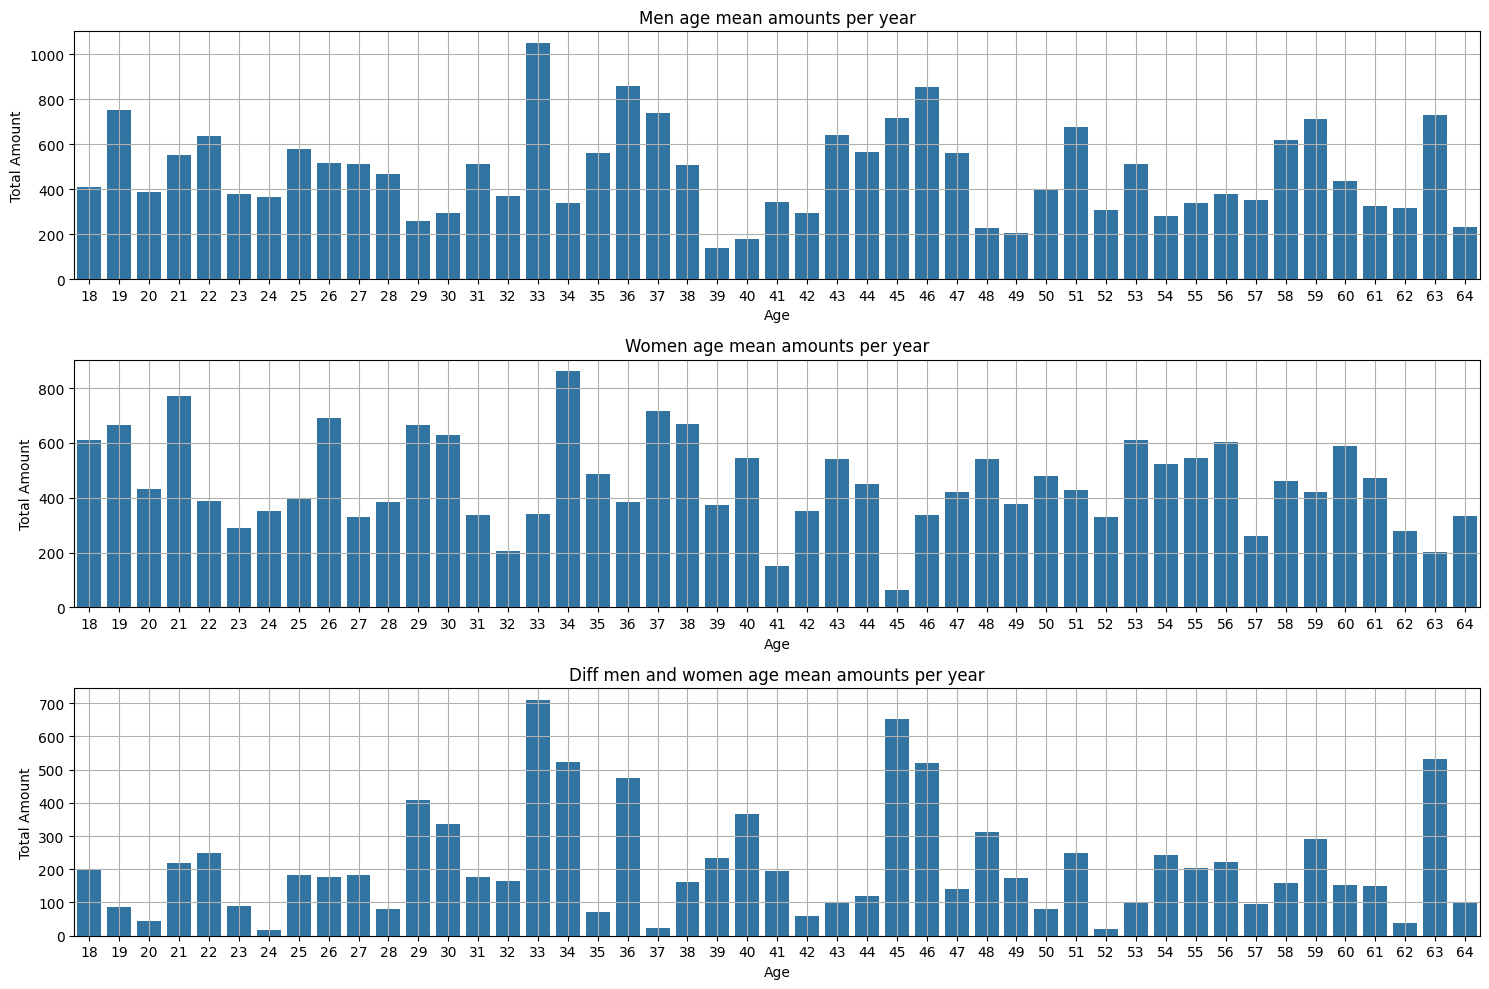

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya, kita sudah memiliki dua DataFrame: men_df dan women_df
# Keduanya memiliki kolom 'Age' dan 'Total Amount'

# Menghitung rata-rata 'Total Amount' per umur untuk pria
age_amount_per_year_men = pd.DataFrame(
    men_df.groupby(['Age'])['Total Amount'].mean()
).reset_index()

# Menghitung rata-rata 'Total Amount' per umur untuk wanita
age_amount_per_year_women = pd.DataFrame(
    women_df.groupby(['Age'])['Total Amount'].mean()
).reset_index()

# Menghitung selisih absolut rata-rata antara pria dan wanita per umur
age_amount_per_year_diff = pd.DataFrame({
    'Age': age_amount_per_year_men['Age'],
    'Total Amount': abs(
        age_amount_per_year_men['Total Amount'] - age_amount_per_year_women['Total Amount']
    )
})

# Membuat subplots 3 baris dan 1 kolom
figure, ax = plt.subplots(3, 1, figsize=(15, 10))

# Plot untuk pria
sns.barplot(data=age_amount_per_year_men, x='Age', y='Total Amount', ax=ax[0])
ax[0].set_title('Men age mean amounts per year')
ax[0].grid()

# Plot untuk wanita
sns.barplot(data=age_amount_per_year_women, x='Age', y='Total Amount', ax=ax[1])
ax[1].set_title('Women age mean amounts per year')
ax[1].grid()

# Plot selisih absolut antara pria dan wanita
sns.barplot(data=age_amount_per_year_diff, x='Age', y='Total Amount', ax=ax[2])
ax[2].set_title('Diff men and women age mean amounts per year')
ax[2].grid()

# Tata letak agar tidak saling bertumpuk
plt.tight_layout()
plt.show()

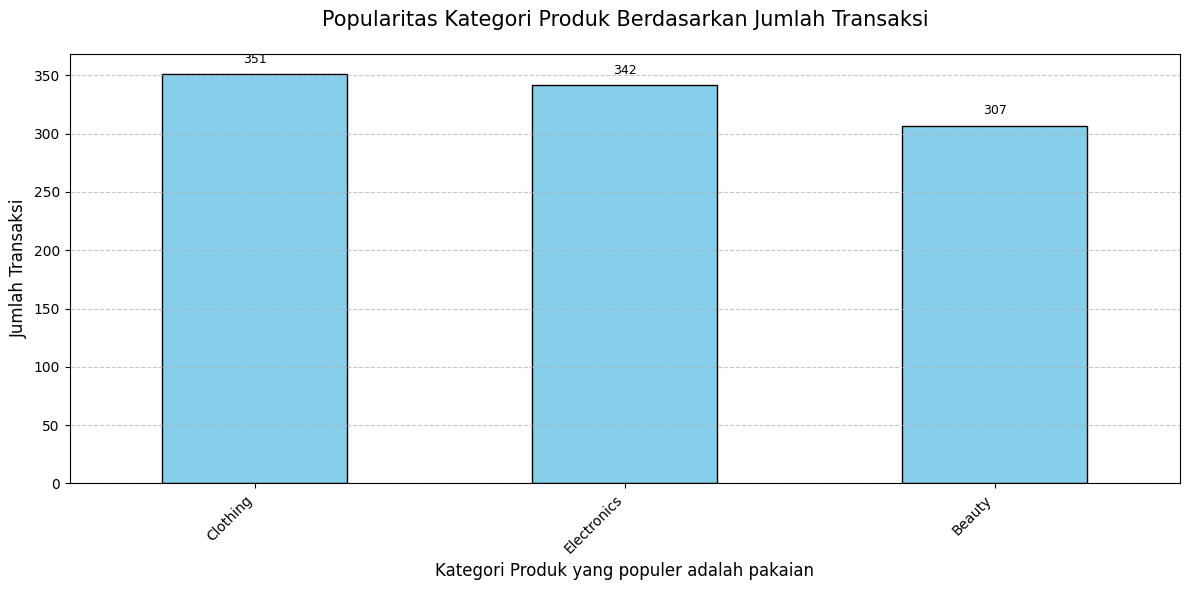

In [6]:
import matplotlib.pyplot as plt

# Menghitung frekuensi setiap kategori produk
product_counts = data["Product Category"].value_counts()

# Membuat plot batang
plt.figure(figsize=(12, 6))
ax = product_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Popularitas Kategori Produk Berdasarkan Jumlah Transaksi', fontsize=15, pad=20)
plt.xlabel('Kategori Produk yang populer adalah pakaian', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas setiap batang
for i, v in enumerate(product_counts):
    ax.text(i, v + 0.02 * max(product_counts), str(v),
            ha='center', va='bottom', fontsize=9)

# Rotasi label x-axis untuk keterbacaan
plt.xticks(rotation=45, ha='right')

# Menyesuaikan layout
plt.tight_layout()
plt.show()